# Basic Stat in numpy/scipy

First we import the relevant libraries  
And set the random seed

In [1]:
#import matplotlib
#matplotlib.pyplot.plot(...)

#Note this is the same as
#import pylab
#pylab.plot(...)

#also can do
#import matplotlib.pyplot as plt

#we will do
from pylab import *
%matplotlib inline
from scipy import stats
import numpy as np

np.random.seed(7)

### One dimensional array

In [2]:
x = np.array([2,3,1,0])
print x
y1 = np.arange(10)
print y1
y2 = np.arange(2, 3, 0.1)
print y2


[2 3 1 0]
[0 1 2 3 4 5 6 7 8 9]
[ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]


### Two dimensional array

In [3]:
a = np.array([[1,2,3],[4,5,6]]) 
print(b.shape)
print(b[0,0])
z = np.zeros((2, 3))
print z

NameError: name 'b' is not defined

In [4]:
b = np.ones((1,2))
print(b.T)
c = np.eye(3)         
print(c)
d = np.reshape(c,[9,1])
print(d)

[[ 1.]
 [ 1.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]


### Array Math

In [5]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

v1 = np.array([6,7])
v2 = np.array([8, 9])

print(x + y)
print(np.add(x, y))
print(np.sqrt(x))
print(np.dot(v1, v2))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]
[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]
111


### Sparse Matrix

In [6]:
import scipy.sparse

#create a sparse matrix
n = 100000
x = (np.random.rand(n)*2).astype(int).astype(float) 

In [7]:
x_csr = scipy.sparse.csr_matrix(x)
x_dok = scipy.sparse.dok_matrix(x.reshape(x_csr.shape))

### Simple Statistics

In [8]:
sample1 = stats.norm.rvs(size=400)
sample2 = stats.norm.rvs(loc=0.15, size=400)

(array([   1.,    8.,   26.,   73.,  119.,   79.,   59.,   27.,    7.]),
 array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 9 Patch objects>)

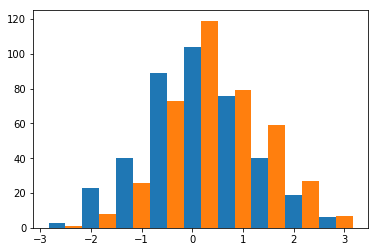

In [12]:
bins = np.linspace(-3,3,10)
hist(sample1,bins,rwidth=0.5)
hist(sample2,bins,rwidth=0.5, align=u'right')

In [13]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-3.9374705586192502, pvalue=8.9539111592273926e-05)

In [14]:
exp1 = np.exp(sample1)
exp2 = np.exp(sample2)
stats.ttest_ind(exp1, exp2)

Ttest_indResult(statistic=-2.6625192343076365, pvalue=0.0079119847319338542)

Kolmogorov-Smirnov test (2 sample KS test nonparametric)

In [15]:
stats.ks_2samp(exp1,exp2)

Ks_2sampResult(statistic=0.13, pvalue=0.0020507254176662429)

### Many other functionalities

For example,
Mathematical optimization (https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)  
Resources for other things https://docs.scipy.org/doc/scipy/reference/tutorial/ , http://scipy-cookbook.readthedocs.io/

In [16]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[ 1.  1.  1.  1.  1.]


In [17]:
rosen(x0)

848.22000000000003